In [2]:
import numpy as np
import pandas as pd
matches=pd.read_csv('matches.csv')
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
matches.shape

(756, 18)

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [6]:
matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [7]:
#Filling the values of city based on venue
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]

In [8]:
for team in matches['team1'].unique():
    print(team)

Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

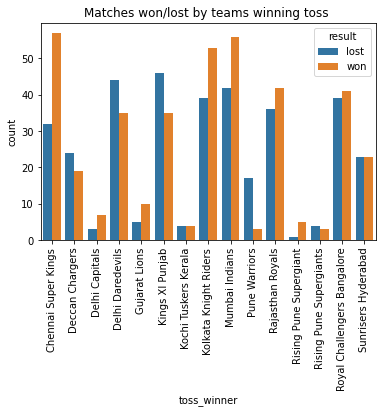

In [10]:
#Toss affecting the win dataframe
toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()
#Visualization
plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_win_result_df)
plot.set_title('Matches won/lost by teams winning toss ')
plot.set_xticklabels(toss_win_result_df['toss_winner'].unique(),rotation=90)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4856\1885394156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")


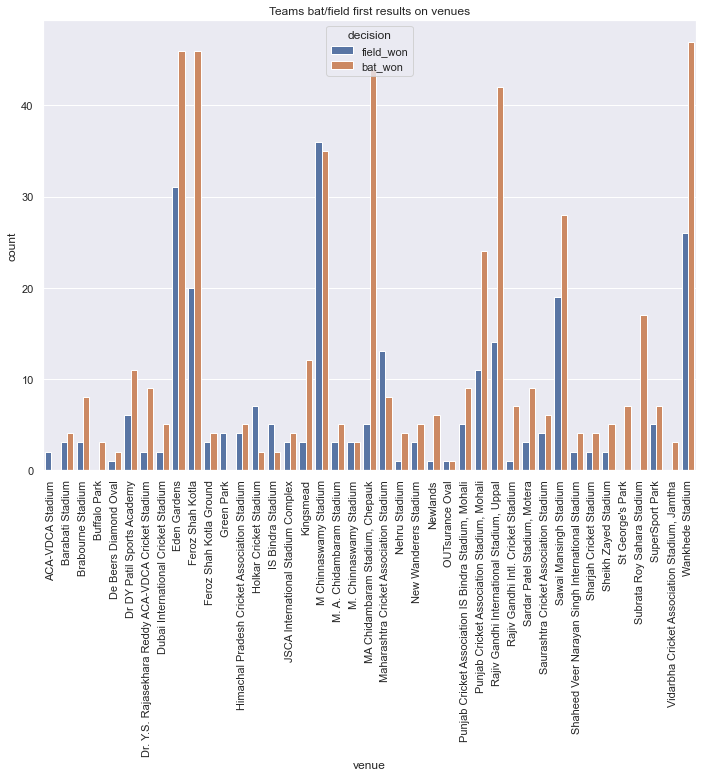

In [11]:
#Winning stats of teams bat/field first by venues 
venue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")
#Visualization
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.barplot(x="venue", y="count", hue="decision", data=venue_result)
plot.set_title('Teams bat/field first results on venues')
plot.set_xticklabels(venue_result['venue'].unique(),rotation=90)
plt.show()

Text(0.5, 1.0, 'No of matches won by different teams')

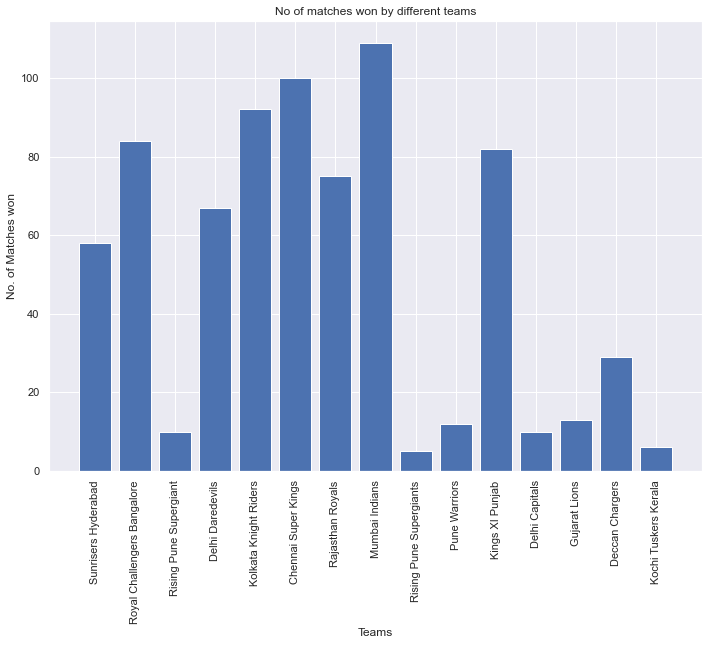

In [12]:
teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

In [13]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

In [15]:

#outcome variable team1_win as a probability of team1 winning the match
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1


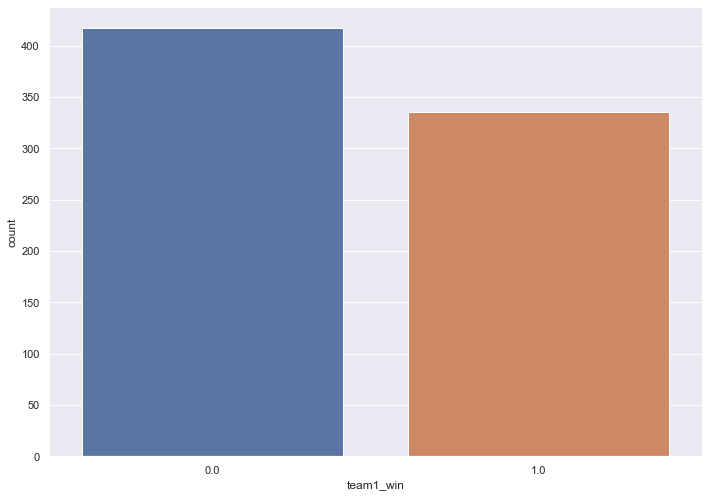

In [16]:
#Checking for the distribution of the dataset
sns.countplot(x="team1_win",data=matches)
plt.show()

In [17]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,13,12,0.0,1.0,28
1,8,11,0.0,0.0,21
2,4,7,0.0,0.0,31
3,11,5,0.0,0.0,13
4,12,3,1.0,1.0,17
...,...,...,...,...,...
751,7,8,0.0,0.0,40
752,0,8,1.0,0.0,18
753,13,2,0.0,0.0,0
754,2,0,0.0,0.0,0


In [18]:
prediction_df.corr()

,team1,team2,team1_toss_win,team1_bat,team1_win,venue
team1,1.000000,-0.108116,-0.116832,-0.116832,-0.017956,0.108240
team2,-0.108116,1.000000,-0.008782,-0.008782,-0.008492,0.084187
team1_toss_win,-0.116832,-0.008782,1.000000,1.000000,0.021521,0.050049
team1_bat,-0.116832,-0.008782,1.000000,1.000000,0.021521,0.050049
team1_win,-0.017956,-0.008492,0.021521,0.021521,1.000000,0.016037
venue,0.108240,0.084187,0.050049,0.050049,0.016037,1.000000


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
#feature selection
x= prediction_df.drop('team1_win', axis=1)
y = prediction_df['team1_win']
y=y.astype(int)


In [21]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0,shuffle=True)


In [22]:

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
print("")


#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))
print(" ")

#SVM
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("confusion matrix \n",confusion_matrix(y_test,y_pred))
print("Classification report \n",classification_report(y_test,y_pred))
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))
print(" ")




confusion matrix 
 [[93  2]
 [56  0]]
Classification report 
               precision    recall  f1-score   support

           0       0.62      0.98      0.76        95
           1       0.00      0.00      0.00        56

    accuracy                           0.62       151
   macro avg       0.31      0.49      0.38       151
weighted avg       0.39      0.62      0.48       151

Accuracy of Logistic Regression Classifier on test set: 0.6159

confusion matrix 
 [[62 33]
 [25 31]]
Classification report 
               precision    recall  f1-score   support

           0       0.71      0.65      0.68        95
           1       0.48      0.55      0.52        56

    accuracy                           0.62       151
   macro avg       0.60      0.60      0.60       151
weighted avg       0.63      0.62      0.62       151

Accuracy of Decision Tree Classifier on test set: 0.6159
 
confusion matrix 
 [[95  0]
 [56  0]]
Classification report 
               precision    recall  f1

C:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#Random Fore`st Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy of Random Forest Classifier on test set: 0.5629
Confusion matrix
 [[60 35]
 [31 25]]
              precision    recall  f1-score   support

           0       0.66      0.63      0.65        95
           1       0.42      0.45      0.43        56

    accuracy                           0.56       151
   macro avg       0.54      0.54      0.54       151
weighted avg       0.57      0.56      0.57       151

